In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
df = sns.load_dataset("titanic")

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck      

In [2]:
# Fill missing age values with the mean age
df["age"] = df["age"].fillna(df["age"].mean())
# Fill missing deck values with forward fill
df["deck"] = df["deck"].ffill()
# Drop remaining missing values
df.dropna(inplace=True)

<Axes: xlabel='sex', ylabel='age'>

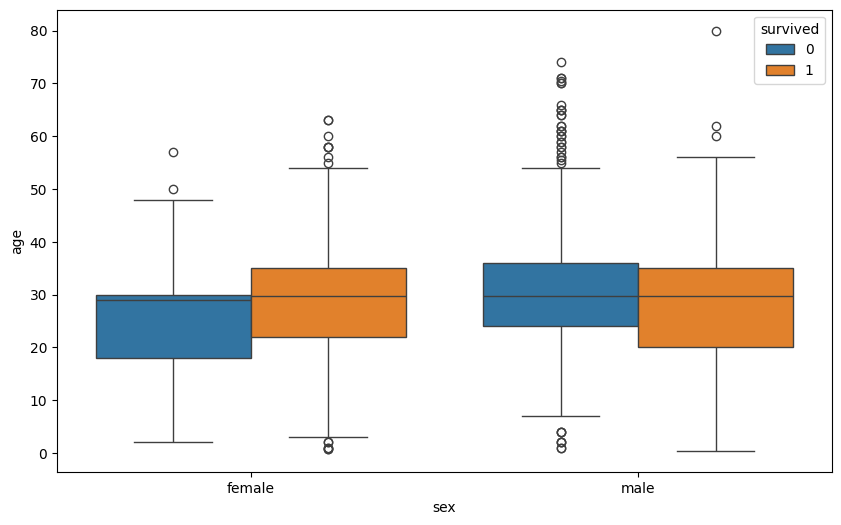

In [4]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="sex",y="age",hue="survived")

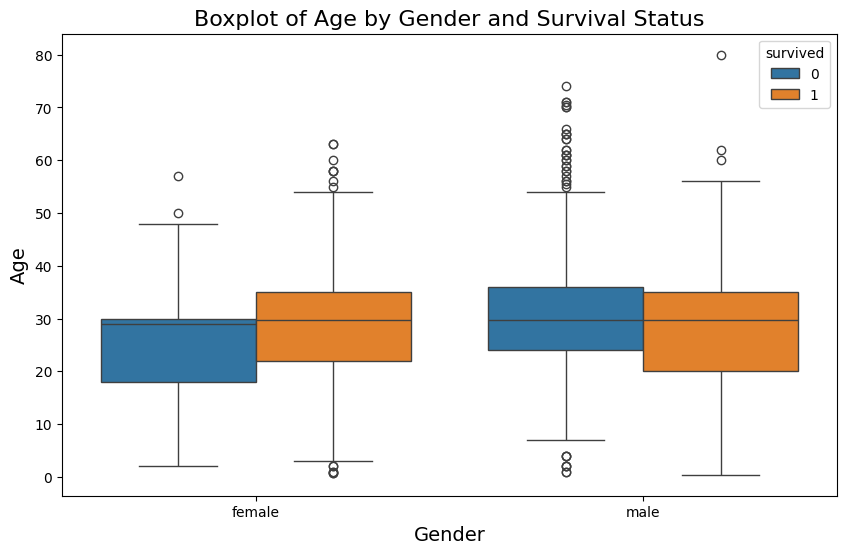

In [5]:
# Boxplot for distribution of age with respect to gender and survival status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="sex", y="age", hue="survived")
plt.title('Boxplot of Age by Gender and Survival Status', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

In [6]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

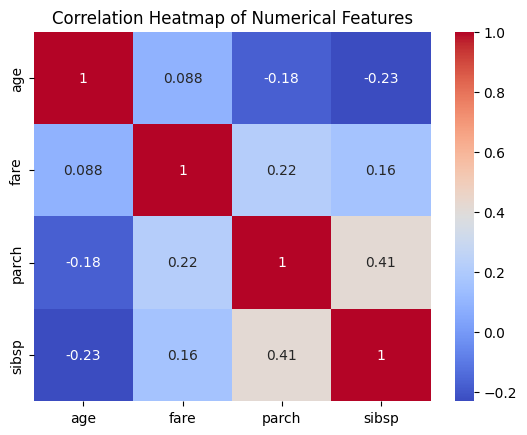

In [8]:
numerical_corr=df[["age","fare","parch","sibsp"]].corr()
sns.heatmap(data=numerical_corr,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3392\1260443981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="pclass", y="survived", palette='Set1')


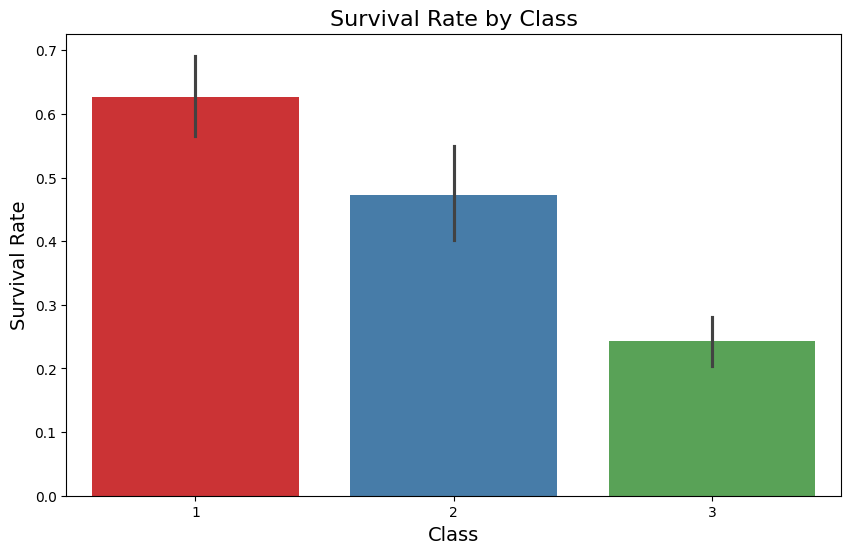

In [9]:
# Additional analysis: Let's create a bar plot for survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="pclass", y="survived", palette='Set1')
plt.title('Survival Rsate by Class', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.show()